In [4]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs

In [2]:
suppl = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in suppl if m]

RDKit WARNING: [14:05:55]  S group DAT ignored on line 2516
RDKit WARNING: [14:05:55]  S group DAT ignored on line 2516
RDKit WARNING: [14:05:55]  S group DAT ignored on line 2516
RDKit WARNING: [14:05:55]  S group DAT ignored on line 2516
RDKit WARNING: [14:05:55]  S group DAT ignored on line 15552
RDKit WARNING: [14:05:55]  S group DAT ignored on line 15552
RDKit WARNING: [14:05:55]  S group DAT ignored on line 15552
RDKit WARNING: [14:05:55]  S group DAT ignored on line 15552
RDKit ERROR: [14:05:55] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:05:55] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [14:05:55] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [14:05:55] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [14:05:55]  S group GEN ignored on line 102860
RDKit ERROR: [14:05:55] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:05:55]  Unhand

RDKit ERROR: [14:05:56] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [14:05:56] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [14:05:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [14:05:56] Explicit valence for atom # 53 N, 4, is greater than permitted
RDKit ERROR: [14:05:56] ERROR: Could not sanitize molecule ending on line 472285
RDKit ERROR: [14:05:56] ERROR: Explicit valence for atom # 53 N, 4, is greater than permitted
RDKit ERROR: [14:05:56] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
RDKit ERROR: 
RDKit ERROR: [14:05:56] ERROR: Could not sanitize molecule ending on line 480504
RDKit ERROR: [14:05:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
RDKit ERROR: 
RDKit ERROR: [14:05:56] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [14:05:56] ERROR: Could not sanitize molecule ending on line 499305
RDKit ERROR: [14:05:5

RDKit ERROR: [14:05:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:05:56]  Unhandled CTAB feature: S group SRU on line: 754017. Molecule skipped.
RDKit ERROR: [14:05:57] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [14:05:57] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [14:05:57] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [14:05:57]  Unhandled CTAB feature: S group SRU on line: 1148513. Molecule skipped.
RDKit ERROR: [14:05:57] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [14:05:57] ERROR: Could not sanitize molecule ending on line 1151592


In [3]:
morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]

In [6]:
DataStructs.FingerprintSimilarity(morgan_fps[0], morgan_fps[666], metric=DataStructs.TanimotoSimilarity)

0.14516129032258066

In [7]:
DataStructs.FingerprintSimilarity(morgan_fps[0], morgan_fps[666], metric=DataStructs.DiceSimilarity)

0.2535211267605634

In [8]:
DataStructs.FingerprintSimilarity(morgan_fps[0], morgan_fps[666], metric=DataStructs.McConnaugheySimilarity)

-0.3637042569081404

In [9]:
aspirin = Chem.MolFromSmiles("O=C(C)Oc1ccccc1C(=O)O")

In [10]:
aspirin_fp = Chem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024)

In [11]:
similarities_to_aspirin_fp = [DataStructs.FingerprintSimilarity(aspirin_fp, fp, metric=DataStructs.TanimotoSimilarity)
                              for fp in morgan_fps]

In [12]:
similarities_to_aspirin_fp[:10]

[0.12389380530973451,
 0.10317460317460317,
 0.09259259259259259,
 0.10434782608695652,
 0.05555555555555555,
 0.10101010101010101,
 0.10891089108910891,
 0.11538461538461539,
 0.051470588235294115,
 0.09210526315789473]

In [17]:
similarity_hits = sorted(zip(drugbank, similarities_to_aspirin_fp), key=lambda x: x[1], reverse=True)
similarity_hits[:10]

[(<rdkit.Chem.rdchem.Mol at 0x7fb4f86e0620>, 1.0),
 (<rdkit.Chem.rdchem.Mol at 0x7fb4f86e72b0>, 0.6129032258064516),
 (<rdkit.Chem.rdchem.Mol at 0x7fb4f8655710>, 0.5277777777777778),
 (<rdkit.Chem.rdchem.Mol at 0x7fb4f87035d0>, 0.52),
 (<rdkit.Chem.rdchem.Mol at 0x7fb4f86e0350>, 0.4642857142857143),
 (<rdkit.Chem.rdchem.Mol at 0x7fb4f86f5080>, 0.43333333333333335),
 (<rdkit.Chem.rdchem.Mol at 0x7fb4f8711f80>, 0.43333333333333335),
 (<rdkit.Chem.rdchem.Mol at 0x7fb4f86f9440>, 0.42424242424242425),
 (<rdkit.Chem.rdchem.Mol at 0x7fb4f86d7c60>, 0.4166666666666667),
 (<rdkit.Chem.rdchem.Mol at 0x7fb4f8693df0>, 0.3888888888888889)]

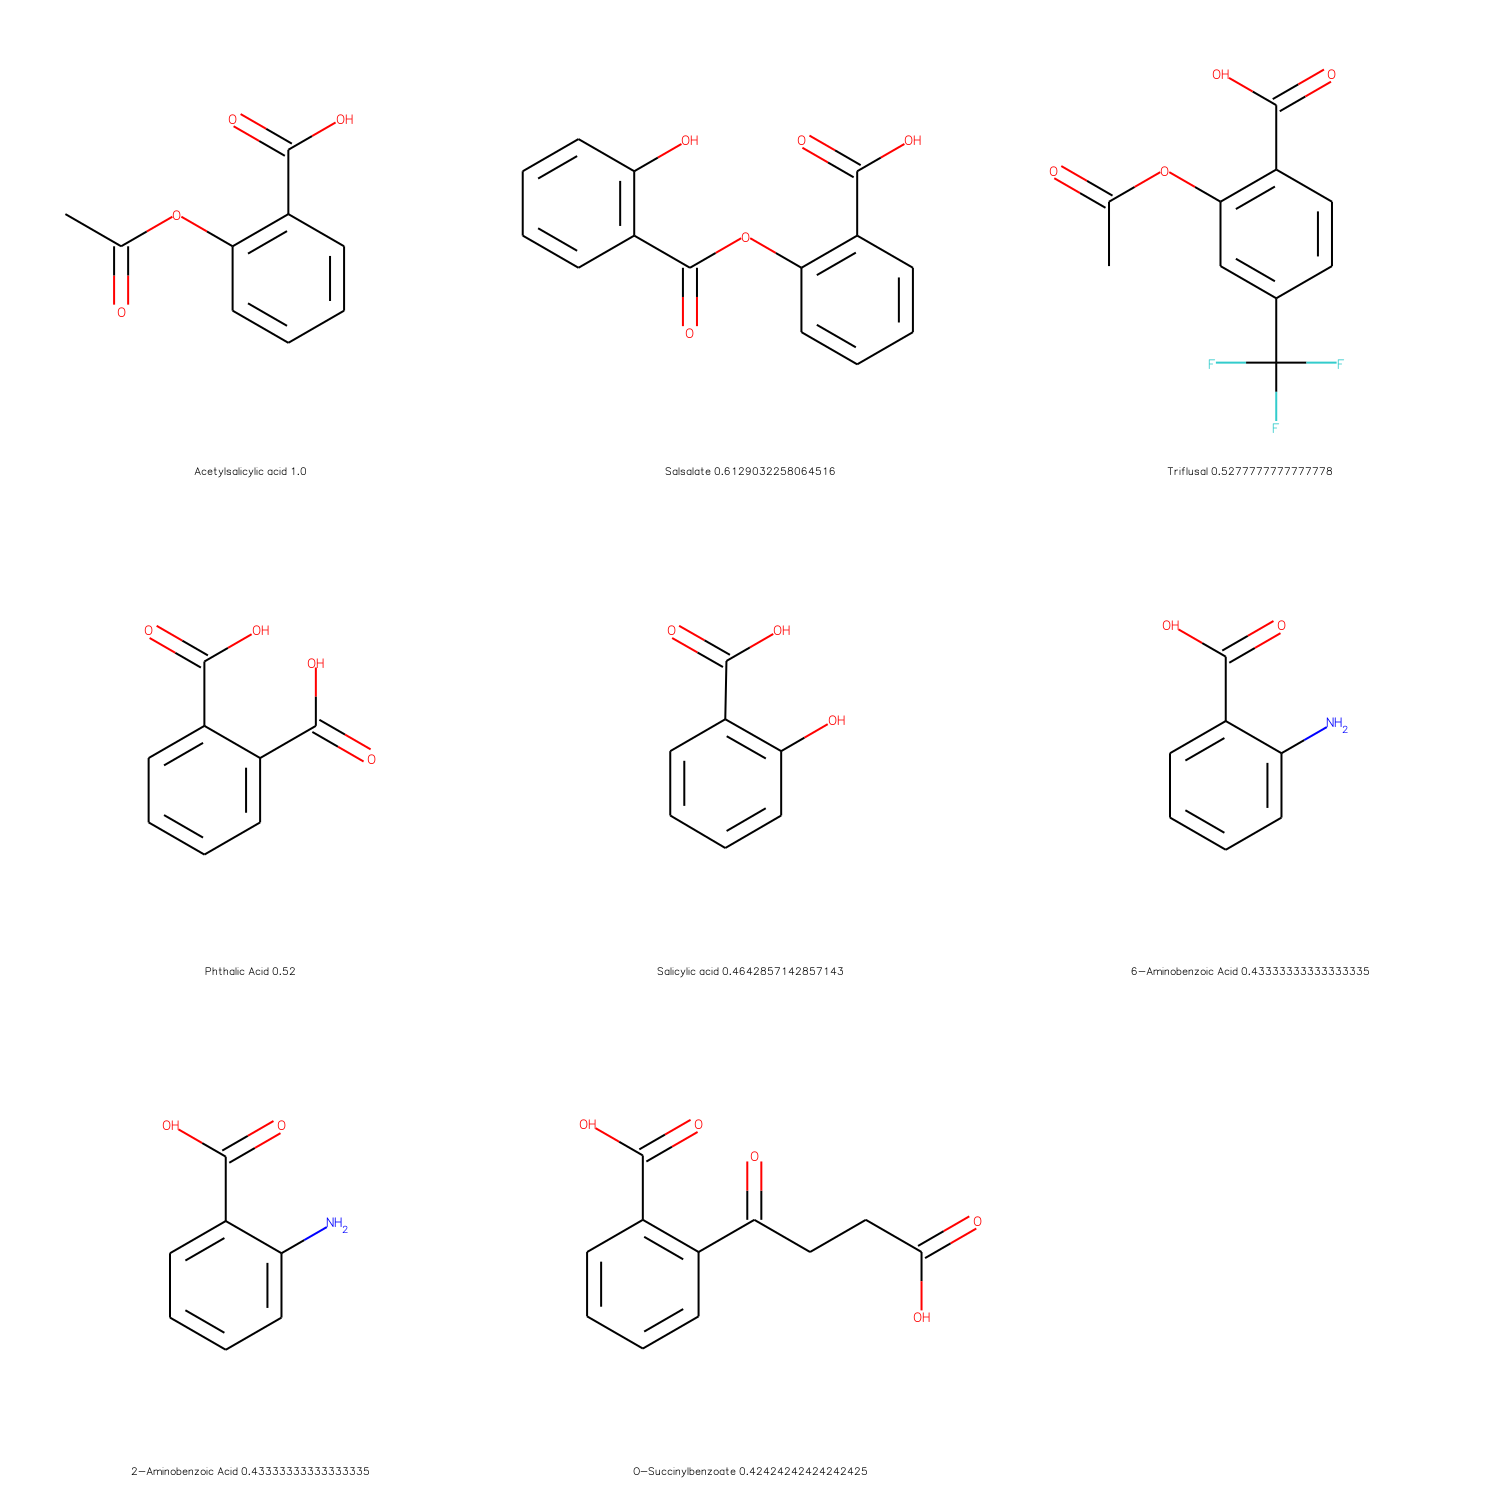

In [19]:
Draw.MolsToGridImage([m[0] for m in similarity_hits[:8]], subImgSize=(500, 500),
                     legends=[m[0].GetProp('GENERIC_NAME') + ' ' + str(m[1])
                              for m in similarity_hits[:8]])

In [22]:
aspirin_fp = Chem.GetMorganFingerprint(aspirin, 2)
dir(aspirin_fp)

['GetLength',
 'GetNonzeroElements',
 'GetTotalVal',
 'ToBinary',
 'UpdateFromSequence',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__']

In [23]:
aspirin_fp.GetNonzeroElements()

{98513984: 2,
 132611095: 1,
 509662800: 1,
 673156540: 1,
 864662311: 1,
 864674487: 1,
 864942730: 2,
 951226070: 2,
 1015506671: 1,
 1135286194: 1,
 1510328189: 2,
 1533864325: 1,
 1654840205: 1,
 2014543234: 1,
 2077658817: 1,
 2246699815: 2,
 2246728737: 1,
 2309124039: 1,
 2664995851: 1,
 2784506312: 1,
 2987120039: 1,
 3217380708: 2,
 3218693969: 4,
 3545365497: 1,
 3999906991: 2}

In [24]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [43]:
picker = MaxMinPicker()

In [44]:
def counter():
    x = 0
    while True:
        x += 1
        yield x

In [52]:
c = counter()

In [53]:
def distance_function(index1, index2, *args, fingerprints=morgan_fps, counter=c):
    print(index1, index2, next(c))
    return 1 - DataStructs.FingerprintSimilarity(morgan_fps[index1], morgan_fps[index2],
                                                 metric=DataStructs.TanimotoSimilarity)

In [57]:
picked = list(picker.LazyPick(distance_function, len(morgan_fps), 20, seed=666))

0 4980 15779
1 4980 15780
2 4980 15781
3 4980 15782
4 4980 15783
5 4980 15784
6 4980 15785
7 4980 15786
8 4980 15787
9 4980 15788
10 4980 15789
11 4980 15790
12 4980 15791
13 4980 15792
14 4980 15793
15 4980 15794
16 4980 15795
17 4980 15796
18 4980 15797
19 4980 15798
20 4980 15799
21 4980 15800
22 4980 15801
23 4980 15802
24 4980 15803
25 4980 15804
26 4980 15805
27 4980 15806
28 4980 15807
29 4980 15808
30 4980 15809
31 4980 15810
32 4980 15811
33 4980 15812
34 4980 15813
35 4980 15814
36 4980 15815
37 4980 15816
38 4980 15817
39 4980 15818
40 4980 15819
41 4980 15820
42 4980 15821
43 4980 15822
44 4980 15823
45 4980 15824
46 4980 15825
47 4980 15826
48 4980 15827
49 4980 15828
50 4980 15829
51 4980 15830
52 4980 15831
53 4980 15832
54 4980 15833
55 4980 15834
56 4980 15835
57 4980 15836
58 4980 15837
59 4980 15838
60 4980 15839
61 4980 15840
62 4980 15841
63 4980 15842
64 4980 15843
65 4980 15844
66 4980 15845
67 4980 15846
68 4980 15847
69 4980 15848
70 4980 15849
71 4980 15850
72

848 4980 16627
849 4980 16628
850 4980 16629
851 4980 16630
852 4980 16631
853 4980 16632
854 4980 16633
855 4980 16634
856 4980 16635
857 4980 16636
858 4980 16637
859 4980 16638
860 4980 16639
861 4980 16640
862 4980 16641
863 4980 16642
864 4980 16643
865 4980 16644
866 4980 16645
867 4980 16646
868 4980 16647
869 4980 16648
870 4980 16649
871 4980 16650
872 4980 16651
873 4980 16652
874 4980 16653
875 4980 16654
876 4980 16655
877 4980 16656
878 4980 16657
879 4980 16658
880 4980 16659
881 4980 16660
882 4980 16661
883 4980 16662
884 4980 16663
885 4980 16664
886 4980 16665
887 4980 16666
888 4980 16667
889 4980 16668
890 4980 16669
891 4980 16670
892 4980 16671
893 4980 16672
894 4980 16673
895 4980 16674
896 4980 16675
897 4980 16676
898 4980 16677
899 4980 16678
900 4980 16679
901 4980 16680
902 4980 16681
903 4980 16682
904 4980 16683
905 4980 16684
906 4980 16685
907 4980 16686
908 4980 16687
909 4980 16688
910 4980 16689
911 4980 16690
912 4980 16691
913 4980 16692
914 4980 1

1550 4980 17329
1551 4980 17330
1552 4980 17331
1553 4980 17332
1554 4980 17333
1555 4980 17334
1556 4980 17335
1557 4980 17336
1558 4980 17337
1559 4980 17338
1560 4980 17339
1561 4980 17340
1562 4980 17341
1563 4980 17342
1564 4980 17343
1565 4980 17344
1566 4980 17345
1567 4980 17346
1568 4980 17347
1569 4980 17348
1570 4980 17349
1571 4980 17350
1572 4980 17351
1573 4980 17352
1574 4980 17353
1575 4980 17354
1576 4980 17355
1577 4980 17356
1578 4980 17357
1579 4980 17358
1580 4980 17359
1581 4980 17360
1582 4980 17361
1583 4980 17362
1584 4980 17363
1585 4980 17364
1586 4980 17365
1587 4980 17366
1588 4980 17367
1589 4980 17368
1590 4980 17369
1591 4980 17370
1592 4980 17371
1593 4980 17372
1594 4980 17373
1595 4980 17374
1596 4980 17375
1597 4980 17376
1598 4980 17377
1599 4980 17378
1600 4980 17379
1601 4980 17380
1602 4980 17381
1603 4980 17382
1604 4980 17383
1605 4980 17384
1606 4980 17385
1607 4980 17386
1608 4980 17387
1609 4980 17388
1610 4980 17389
1611 4980 17390
1612 498

2239 4980 18018
2240 4980 18019
2241 4980 18020
2242 4980 18021
2243 4980 18022
2244 4980 18023
2245 4980 18024
2246 4980 18025
2247 4980 18026
2248 4980 18027
2249 4980 18028
2250 4980 18029
2251 4980 18030
2252 4980 18031
2253 4980 18032
2254 4980 18033
2255 4980 18034
2256 4980 18035
2257 4980 18036
2258 4980 18037
2259 4980 18038
2260 4980 18039
2261 4980 18040
2262 4980 18041
2263 4980 18042
2264 4980 18043
2265 4980 18044
2266 4980 18045
2267 4980 18046
2268 4980 18047
2269 4980 18048
2270 4980 18049
2271 4980 18050
2272 4980 18051
2273 4980 18052
2274 4980 18053
2275 4980 18054
2276 4980 18055
2277 4980 18056
2278 4980 18057
2279 4980 18058
2280 4980 18059
2281 4980 18060
2282 4980 18061
2283 4980 18062
2284 4980 18063
2285 4980 18064
2286 4980 18065
2287 4980 18066
2288 4980 18067
2289 4980 18068
2290 4980 18069
2291 4980 18070
2292 4980 18071
2293 4980 18072
2294 4980 18073
2295 4980 18074
2296 4980 18075
2297 4980 18076
2298 4980 18077
2299 4980 18078
2300 4980 18079
2301 498

3072 4980 18851
3073 4980 18852
3074 4980 18853
3075 4980 18854
3076 4980 18855
3077 4980 18856
3078 4980 18857
3079 4980 18858
3080 4980 18859
3081 4980 18860
3082 4980 18861
3083 4980 18862
3084 4980 18863
3085 4980 18864
3086 4980 18865
3087 4980 18866
3088 4980 18867
3089 4980 18868
3090 4980 18869
3091 4980 18870
3092 4980 18871
3093 4980 18872
3094 4980 18873
3095 4980 18874
3096 4980 18875
3097 4980 18876
3098 4980 18877
3099 4980 18878
3100 4980 18879
3101 4980 18880
3102 4980 18881
3103 4980 18882
3104 4980 18883
3105 4980 18884
3106 4980 18885
3107 4980 18886
3108 4980 18887
3109 4980 18888
3110 4980 18889
3111 4980 18890
3112 4980 18891
3113 4980 18892
3114 4980 18893
3115 4980 18894
3116 4980 18895
3117 4980 18896
3118 4980 18897
3119 4980 18898
3120 4980 18899
3121 4980 18900
3122 4980 18901
3123 4980 18902
3124 4980 18903
3125 4980 18904
3126 4980 18905
3127 4980 18906
3128 4980 18907
3129 4980 18908
3130 4980 18909
3131 4980 18910
3132 4980 18911
3133 4980 18912
3134 498

4072 4980 19851
4073 4980 19852
4074 4980 19853
4075 4980 19854
4076 4980 19855
4077 4980 19856
4078 4980 19857
4079 4980 19858
4080 4980 19859
4081 4980 19860
4082 4980 19861
4083 4980 19862
4084 4980 19863
4085 4980 19864
4086 4980 19865
4087 4980 19866
4088 4980 19867
4089 4980 19868
4090 4980 19869
4091 4980 19870
4092 4980 19871
4093 4980 19872
4094 4980 19873
4095 4980 19874
4096 4980 19875
4097 4980 19876
4098 4980 19877
4099 4980 19878
4100 4980 19879
4101 4980 19880
4102 4980 19881
4103 4980 19882
4104 4980 19883
4105 4980 19884
4106 4980 19885
4107 4980 19886
4108 4980 19887
4109 4980 19888
4110 4980 19889
4111 4980 19890
4112 4980 19891
4113 4980 19892
4114 4980 19893
4115 4980 19894
4116 4980 19895
4117 4980 19896
4118 4980 19897
4119 4980 19898
4120 4980 19899
4121 4980 19900
4122 4980 19901
4123 4980 19902
4124 4980 19903
4125 4980 19904
4126 4980 19905
4127 4980 19906
4128 4980 19907
4129 4980 19908
4130 4980 19909
4131 4980 19910
4132 4980 19911
4133 4980 19912
4134 498

5073 4980 20851
5074 4980 20852
5075 4980 20853
5076 4980 20854
5077 4980 20855
5078 4980 20856
5079 4980 20857
5080 4980 20858
5081 4980 20859
5082 4980 20860
5083 4980 20861
5084 4980 20862
5085 4980 20863
5086 4980 20864
5087 4980 20865
5088 4980 20866
5089 4980 20867
5090 4980 20868
5091 4980 20869
5092 4980 20870
5093 4980 20871
5094 4980 20872
5095 4980 20873
5096 4980 20874
5097 4980 20875
5098 4980 20876
5099 4980 20877
5100 4980 20878
5101 4980 20879
5102 4980 20880
5103 4980 20881
5104 4980 20882
5105 4980 20883
5106 4980 20884
5107 4980 20885
5108 4980 20886
5109 4980 20887
5110 4980 20888
5111 4980 20889
5112 4980 20890
5113 4980 20891
5114 4980 20892
5115 4980 20893
5116 4980 20894
5117 4980 20895
5118 4980 20896
5119 4980 20897
5120 4980 20898
5121 4980 20899
5122 4980 20900
5123 4980 20901
5124 4980 20902
5125 4980 20903
5126 4980 20904
5127 4980 20905
5128 4980 20906
5129 4980 20907
5130 4980 20908
5131 4980 20909
5132 4980 20910
5133 4980 20911
5134 4980 20912
5135 498

6073 4980 21851
6074 4980 21852
6075 4980 21853
6076 4980 21854
6077 4980 21855
6078 4980 21856
6079 4980 21857
6080 4980 21858
6081 4980 21859
6082 4980 21860
6083 4980 21861
6084 4980 21862
6085 4980 21863
6086 4980 21864
6087 4980 21865
6088 4980 21866
6089 4980 21867
6090 4980 21868
6091 4980 21869
6092 4980 21870
6093 4980 21871
6094 4980 21872
6095 4980 21873
6096 4980 21874
6097 4980 21875
6098 4980 21876
6099 4980 21877
6100 4980 21878
6101 4980 21879
6102 4980 21880
6103 4980 21881
6104 4980 21882
6105 4980 21883
6106 4980 21884
6107 4980 21885
6108 4980 21886
6109 4980 21887
6110 4980 21888
6111 4980 21889
6112 4980 21890
6113 4980 21891
6114 4980 21892
6115 4980 21893
6116 4980 21894
6117 4980 21895
6118 4980 21896
6119 4980 21897
6120 4980 21898
6121 4980 21899
6122 4980 21900
6123 4980 21901
6124 4980 21902
6125 4980 21903
6126 4980 21904
6127 4980 21905
6128 4980 21906
6129 4980 21907
6130 4980 21908
6131 4980 21909
6132 4980 21910
6133 4980 21911
6134 4980 21912
6135 498

7073 4980 22851
7074 4980 22852
7075 4980 22853
7076 4980 22854
7077 4980 22855
7078 4980 22856
7079 4980 22857
7080 4980 22858
7081 4980 22859
7082 4980 22860
7083 4980 22861
7084 4980 22862
7085 4980 22863
7086 4980 22864
7087 4980 22865
7088 4980 22866
7089 4980 22867
7090 4980 22868
7091 4980 22869
7092 4980 22870
7093 4980 22871
7094 4980 22872
7095 4980 22873
7096 4980 22874
7097 4980 22875
7098 4980 22876
7099 4980 22877
7100 4980 22878
7101 4980 22879
7102 4980 22880
7103 4980 22881
7104 4980 22882
7105 4980 22883
7106 4980 22884
7107 4980 22885
7108 4980 22886
7109 4980 22887
0 19 22888
3 19 22889
4 19 22890
8 19 22891
15 19 22892
28 19 22893
45 19 22894
60 19 22895
116 19 22896
163 19 22897
219 19 22898
220 19 22899
264 19 22900
300 19 22901
318 19 22902
0 318 22903
3 318 22904
4 318 22905
8 318 22906
15 318 22907
28 318 22908
45 318 22909
339 19 22910
351 19 22911
365 19 22912
400 19 22913
542 19 22914
543 19 22915
645 19 22916
645 318 22917
0 645 22918
3 645 22919
4 645 229

In [58]:
picked_molecules = [drugbank[i] for i in picked]

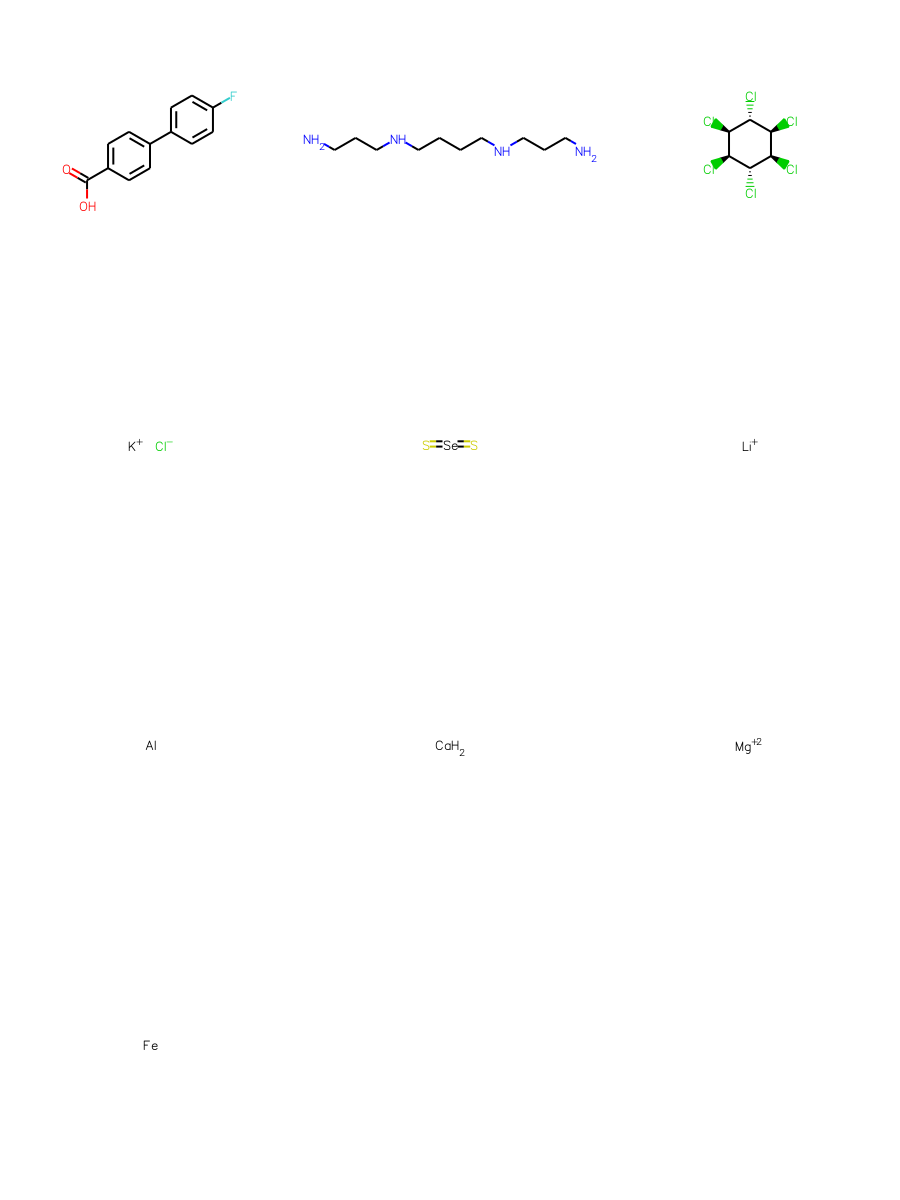

In [62]:
Draw.MolsToGridImage(picked_molecules[:10], subImgSize=(300, 300))

In [63]:
carbon = Chem.MolFromSmarts("[#6]")

In [65]:
organic_drugbank = [m for m in drugbank if m.HasSubstructMatch(carbon)]
len(organic_drugbank), len(drugbank)

(7031, 7110)

In [66]:
org_morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in organic_drugbank]

In [67]:
org_picker = MaxMinPicker()

In [68]:
def org_distance_function(index1, index2, *args, fingerprints=org_morgan_fps):
    return 1 - DataStructs.FingerprintSimilarity(org_morgan_fps[index1], org_morgan_fps[index2],
                                                 metric=DataStructs.TanimotoSimilarity)

In [73]:
org_picked = list(picker.LazyPick(org_distance_function, len(org_morgan_fps), 20, seed=669))

In [74]:
org_picked_molecules = [organic_drugbank[i] for i in org_picked]

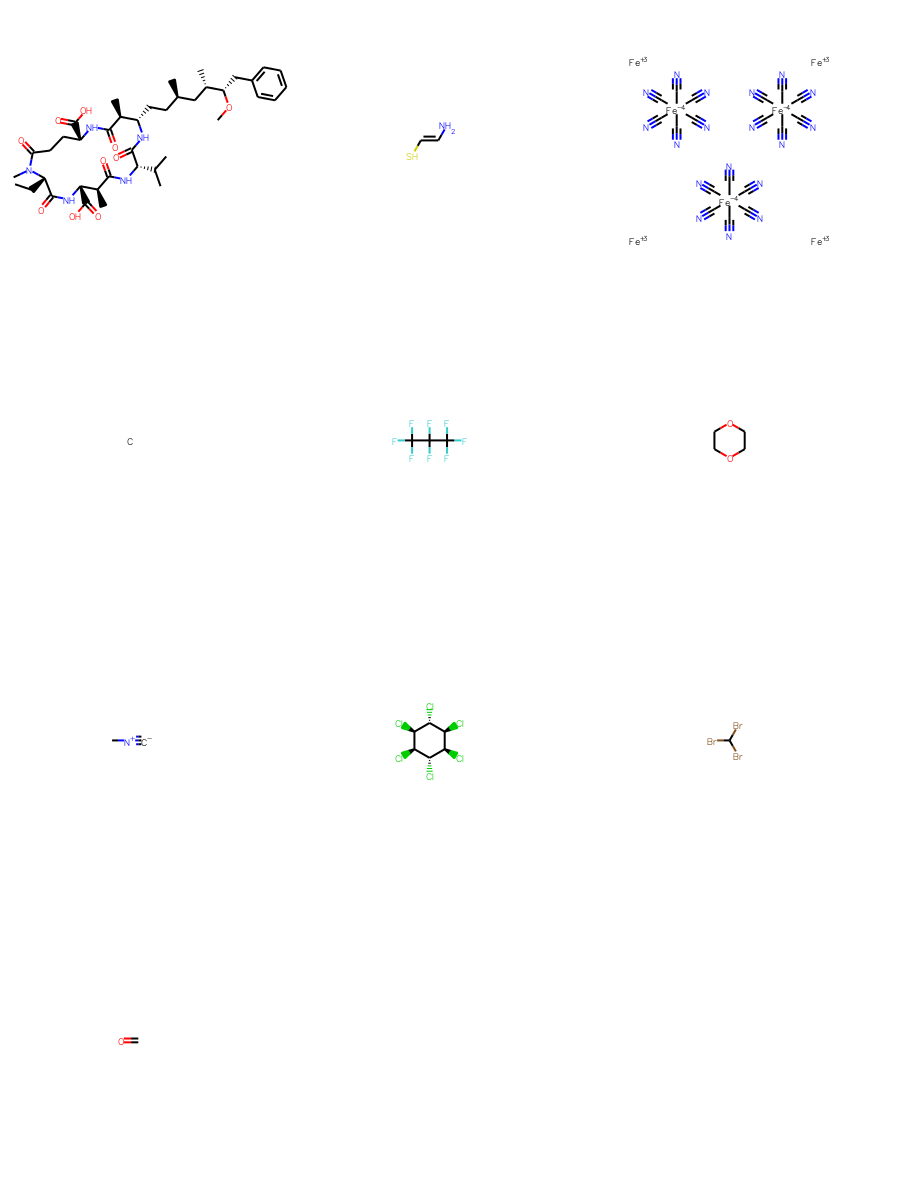

In [75]:
Draw.MolsToGridImage(org_picked_molecules[:10], subImgSize=(300, 300))